# Question 1

# 1 a.

In [41]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [42]:
file_path = 'climate_data.csv'
climate_data = pd.read_csv(file_path)
train_data = climate_data[climate_data['Year'] < 2006]
test_data = climate_data[climate_data['Year'] >= 2006]
X_train = train_data.drop(columns=['Year', 'Month', 'Temp'])
X_test = test_data.drop(columns=['Year', 'Month', 'Temp'])
y_train = train_data['Temp']
y_test = test_data['Temp']
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [43]:
model = sm.OLS(y_train, X_train_const).fit()

In [44]:
y_pred = model.predict(X_test_const)

In [45]:
r2 = r2_score(y_test, y_pred)

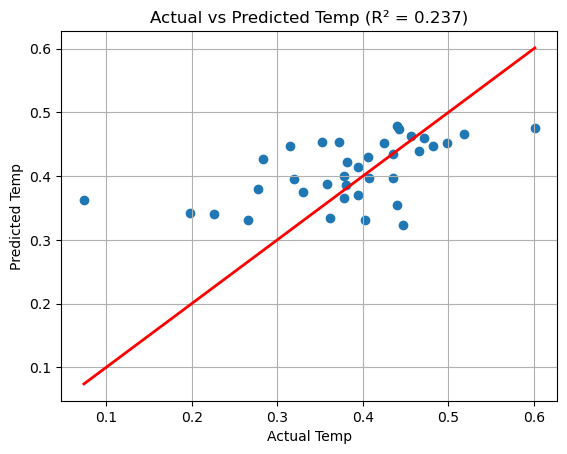

R-squared score: 0.236720986079063


In [46]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title(f'Actual vs Predicted Temp (R² = {r2:.3f})')
plt.grid(True)
plt.show()


# Print the R-squared score
print(f"R-squared score: {r2}")


Steps:
Load the dataset.
Split the data into training and testing sets based on the year (before 2006 for training, 2006 and beyond for testing).
Define the features (excluding Temp, Year, and Month) and the target (Temp).
Train a linear regression model using the training data.
Make predictions using the test data and evaluate the model's performance with the R-squared score.
Plot the actual vs predicted temperatures along with the R-squared score.
This code will display the scatter plot with the R-squared value and output the R-squared score in the console.

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     94.32
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           8.73e-73
Time:                        17:55:04   Log-Likelihood:                 263.83
No. Observations:                 272   AIC:                            -509.7
Df Residuals:                     263   BIC:                            -477.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -123.0808     20.872     -5.897      0.0

# 1b

In [48]:
intercept = model.params['const']
mei_coef = model.params['MEI']
co2_coef = model.params['CO2']
ch4_coef = model.params['CH4']
n2o_coef = model.params['N2O']
cfc11_coef = model.params['CFC-11']
cfc12_coef = model.params['CFC-12']
tsi_coef = model.params['TSI']
aerosols_coef = model.params['Aerosols']
equation = (
    f"Temp = {intercept:.4f} + ({mei_coef:.4f} * MEI) + ({co2_coef:.4f} * CO2) + "
    f"({ch4_coef:.4f} * CH4) + ({n2o_coef:.4f} * N2O) + ({cfc11_coef:.4f} * CFC-11) + "
    f"({cfc12_coef:.4f} * CFC-12) + ({tsi_coef:.4f} * TSI) + ({aerosols_coef:.4f} * Aerosols)"
)

# Print the equation
print(equation)


Temp = -123.0808 + (0.0637 * MEI) + (0.0069 * CO2) + (0.0002 * CH4) + (-0.0162 * N2O) + (-0.0064 * CFC-11) + (0.0036 * CFC-12) + (0.0918 * TSI) + (-1.5203 * Aerosols)


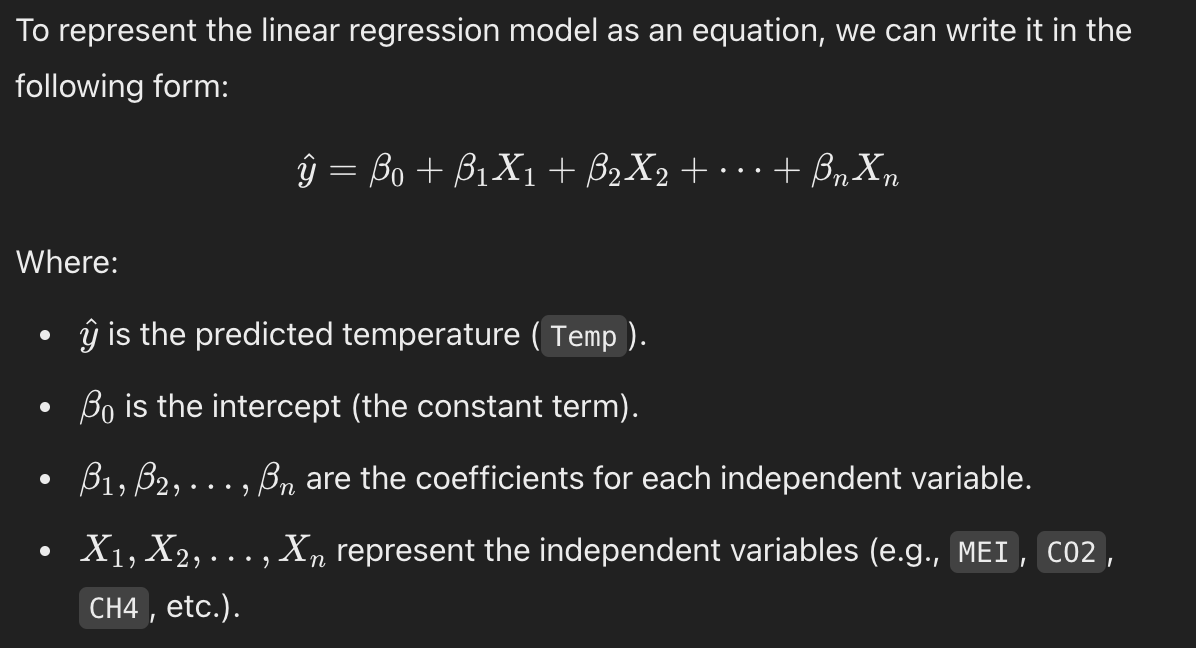

# 1c 

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
correlation_matrix = climate_data.corr()

In [51]:
high_correlation_threshold = 0.75

In [52]:
high_correlation_pairs = correlation_matrix[(correlation_matrix > high_correlation_threshold) & (correlation_matrix != 1.0)]

In [53]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Year     Month       MEI       CO2       CH4       N2O  \
Year      1.000000 -0.025789 -0.145345  0.985379  0.910563  0.994850   
Month    -0.025789  1.000000 -0.016345 -0.096287  0.017558  0.012395   
MEI      -0.145345 -0.016345  1.000000 -0.152911 -0.105555 -0.162375   
CO2       0.985379 -0.096287 -0.152911  1.000000  0.872253  0.981135   
CH4       0.910563  0.017558 -0.105555  0.872253  1.000000  0.894409   
N2O       0.994850  0.012395 -0.162375  0.981135  0.894409  1.000000   
CFC-11    0.460965 -0.014914  0.088171  0.401284  0.713504  0.412155   
CFC-12    0.870067 -0.001084 -0.039836  0.823210  0.958237  0.839295   
TSI       0.022353 -0.032754 -0.076826  0.017867  0.146335  0.039892   
Aerosols -0.361884  0.014845  0.352351 -0.369265 -0.290381 -0.353499   
Temp      0.755731 -0.098016  0.135292  0.748505  0.699697  0.743242   

            CFC-11    CFC-12       TSI  Aerosols      Temp  
Year      0.460965  0.870067  0.022353 -0.361884  0.75

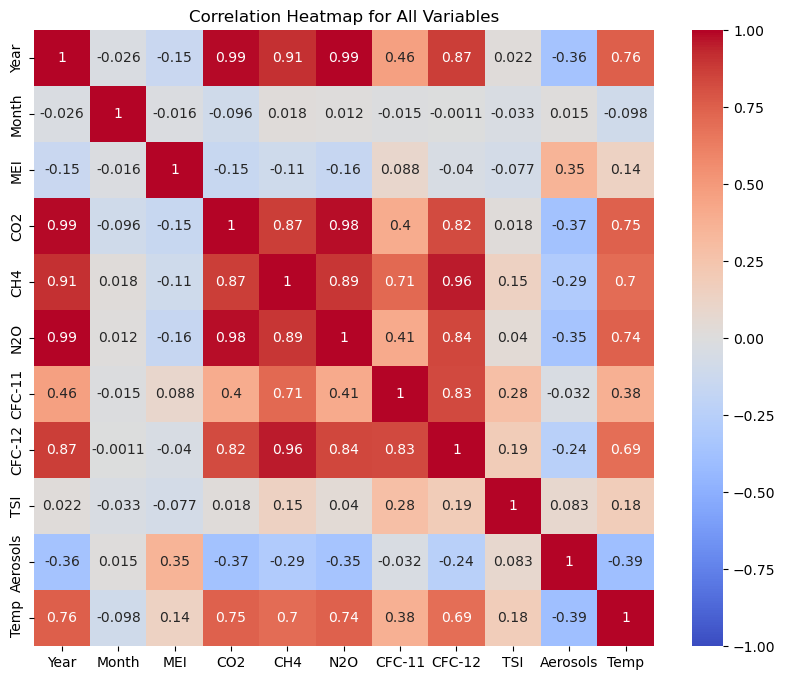

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap for All Variables')
plt.show()

In [55]:
print("\nHighly Correlated Pairs (threshold > 0.75):")
print(high_correlation_pairs.dropna(how='all'))


Highly Correlated Pairs (threshold > 0.75):
            Year  Month  MEI       CO2       CH4       N2O    CFC-11  \
Year         NaN    NaN  NaN  0.985379  0.910563  0.994850       NaN   
CO2     0.985379    NaN  NaN       NaN  0.872253  0.981135       NaN   
CH4     0.910563    NaN  NaN  0.872253       NaN  0.894409       NaN   
N2O     0.994850    NaN  NaN  0.981135  0.894409       NaN       NaN   
CFC-11       NaN    NaN  NaN       NaN       NaN       NaN       NaN   
CFC-12  0.870067    NaN  NaN  0.823210  0.958237  0.839295  0.831381   
Temp    0.755731    NaN  NaN       NaN       NaN       NaN       NaN   

          CFC-12  TSI  Aerosols      Temp  
Year    0.870067  NaN       NaN  0.755731  
CO2     0.823210  NaN       NaN       NaN  
CH4     0.958237  NaN       NaN       NaN  
N2O     0.839295  NaN       NaN       NaN  
CFC-11  0.831381  NaN       NaN       NaN  
CFC-12       NaN  NaN       NaN       NaN  
Temp         NaN  NaN       NaN       NaN  


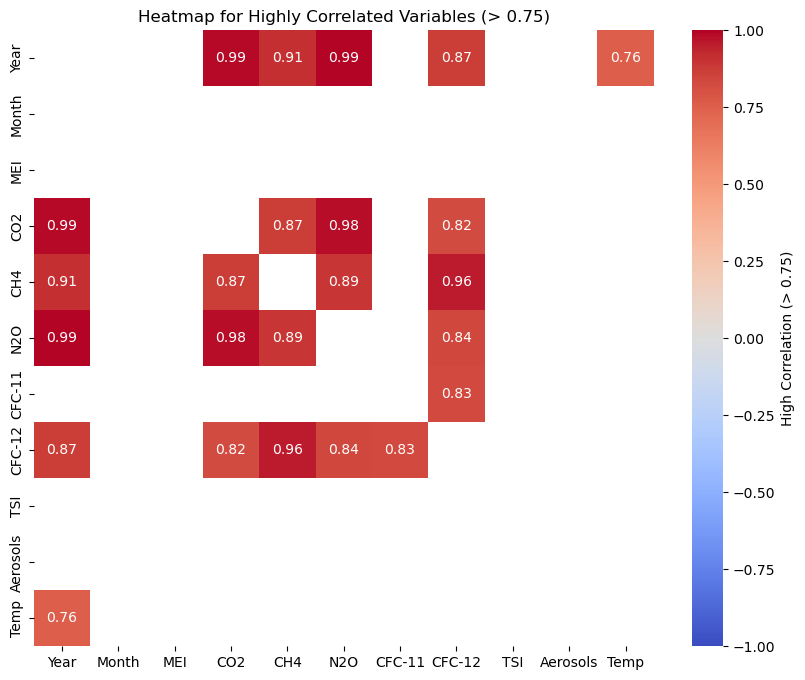

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation_pairs, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=high_correlation_pairs.isnull(), cbar_kws={'label': 'High Correlation (> 0.75)'})
plt.title('Heatmap for Highly Correlated Variables (> 0.75)')
plt.show()

# 1d

In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [58]:
file_path = 'climate_data.csv'
climate_data = pd.read_csv(file_path)
train_data = climate_data[climate_data['Year'] < 2006]
test_data = climate_data[climate_data['Year'] >= 2006]
variables_to_drop = ['CH4', 'N2O', 'CFC-12', 'Year']
X_train_reduced = train_data.drop(columns=['Month', 'Temp'] + variables_to_drop)
X_test_reduced = test_data.drop(columns=['Month', 'Temp'] + variables_to_drop)
y_train = train_data['Temp']
y_test = test_data['Temp']
X_train_reduced_const = sm.add_constant(X_train_reduced)
X_test_reduced_const = sm.add_constant(X_test_reduced)

In [59]:
model_reduced = sm.OLS(y_train, X_train_reduced_const).fit()

In [60]:
y_pred_reduced = model_reduced.predict(X_test_reduced_const)

In [61]:
r2_reduced = r2_score(y_test, y_pred_reduced)

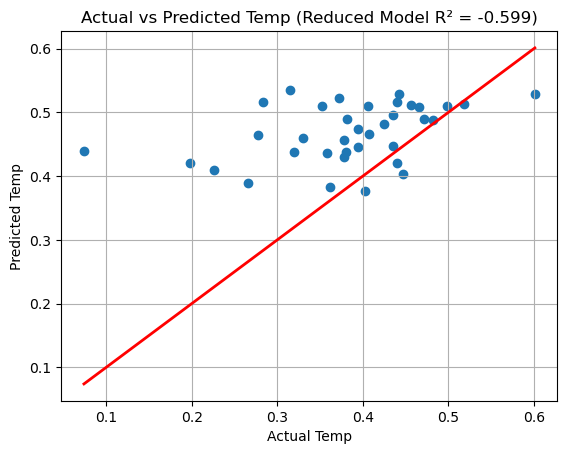

R-squared score: -0.5989793450104846


In [62]:
plt.scatter(y_test, y_pred_reduced)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title(f'Actual vs Predicted Temp (Reduced Model R² = {r2_reduced:.3f})')
plt.grid(True)

# Show the plot
plt.show()
print(f"R-squared score: {r2_reduced}")

In [63]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.90e-73
Time:                        17:55:10   Log-Likelihood:                 256.81
No. Observations:                 272   AIC:                            -501.6
Df Residuals:                     266   BIC:                            -480.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -115.0870     21.053     -5.466      0.0

# Question 2 

# 2 a

In [64]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [65]:
# Load the dataset
data = pd.read_csv('asthma_sample_data.csv')

In [66]:
# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   gender res_inf  ghq12  attack
0  female     yes     21       6
1    male      no     17       4
2    male     yes     30       8
3  female     yes     22       5
4    male     yes     27       2


In [67]:
# Convert categorical variables to numerical format for modeling
data['gender_num'] = np.where(data['gender'] == 'male', 1, 0)
data['res_inf_num'] = np.where(data['res_inf'] == 'yes', 1, 0)

In [68]:
# Define the dependent variable (count of asthma attacks)
y = data['attack']

In [69]:
# Model 1: Poisson regression using 'gender' as predictor
X_gender = sm.add_constant(data['gender_num'])
model_gender = sm.GLM(y, X_gender, family=sm.families.Poisson()).fit()
print("\nPoisson Regression Model using 'gender' as predictor:")
print(model_gender.summary())


Poisson Regression Model using 'gender' as predictor:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 attack   No. Observations:                  120
Model:                            GLM   Df Residuals:                      118
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -248.15
Date:                Sun, 13 Oct 2024   Deviance:                       223.23
Time:                        17:55:13   Pearson chi2:                     191.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05136
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [70]:
# Model 2: Poisson regression using 'res_inf' as predictor
X_res_inf = sm.add_constant(data['res_inf_num'])
model_res_inf = sm.GLM(y, X_res_inf, family=sm.families.Poisson()).fit()
print("\nPoisson Regression Model using 'res_inf' as predictor:")
print(model_res_inf.summary())


Poisson Regression Model using 'res_inf' as predictor:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 attack   No. Observations:                  120
Model:                            GLM   Df Residuals:                      118
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -226.78
Date:                Sun, 13 Oct 2024   Deviance:                       180.49
Time:                        17:55:13   Pearson chi2:                     168.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3356
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [71]:
# Model 3: Poisson regression using 'ghq12' as predictor
X_ghq12 = sm.add_constant(data['ghq12'])
model_ghq12 = sm.GLM(y, X_ghq12, family=sm.families.Poisson()).fit()
print("\nPoisson Regression Model using 'ghq12' as predictor:")
print(model_ghq12.summary())


Poisson Regression Model using 'ghq12' as predictor:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 attack   No. Observations:                  120
Model:                            GLM   Df Residuals:                      118
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -209.10
Date:                Sun, 13 Oct 2024   Deviance:                       145.13
Time:                        17:55:14   Pearson chi2:                     128.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5052
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [72]:
# Summarize the significance of each predictor variable in its respective model
summary_table = pd.DataFrame({
    'Predictor': ['gender', 'res_inf', 'ghq12'],
    'p-value': [model_gender.pvalues[1], model_res_inf.pvalues[1], model_ghq12.pvalues[1]],
    'Coefficient': [model_gender.params[1], model_res_inf.params[1], model_ghq12.params[1]]
})

/var/folders/z_/xvvp4h796z9ggg4w6w81n__m0000gq/T/ipykernel_96081/3369681609.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p-value': [model_gender.pvalues[1], model_res_inf.pvalues[1], model_ghq12.pvalues[1]],
/var/folders/z_/xvvp4h796z9ggg4w6w81n__m0000gq/T/ipykernel_96081/3369681609.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': [model_gender.params[1], model_res_inf.params[1], model_ghq12.params[1]]


In [73]:
print("\nSummary of the Poisson regression models:")
print(summary_table)


Summary of the Poisson regression models:
  Predictor       p-value  Coefficient
0    gender  1.288200e-02    -0.299998
1   res_inf  6.440618e-11     0.903161
2     ghq12  8.024135e-18     0.059500


Interpretation

Gender:

P-value: 0.0129, which is less than the typical significance level of 0.05.

Coefficient: -0.3000.

Interpretation: Gender is statistically significant in predicting asthma attack counts. The negative coefficient suggests that being male (coded as 1) is associated with a decrease in the expected number of attacks compared to females (coded as 0).

Res_inf (Respiratory Infection):

P-value: 6.44×10−11, effectively zero.

Coefficient: 0.9032.

Interpretation: Respiratory infection status is highly significant. The positive coefficient indicates that patients with a respiratory infection have a higher expected number of asthma attacks per year.

GHQ12:

P-value: 8.02×10 −18, effectively zero.

Coefficient: 0.0595.

Interpretation: The GHQ12 score is highly significant in predicting attack counts. A higher GHQ12 score, which indicates worse general health, is associated with an increase in the expected number of asthma attacks.

# 2 b

In [74]:
# Multivariate Poisson regression using all three predictors
X_all = sm.add_constant(data[['gender_num', 'res_inf_num', 'ghq12']])
model_all = sm.GLM(y, X_all, family=sm.families.Poisson()).fit()

In [75]:
# Print the summary of the model
print("\nMultivariate Poisson Regression Model using all 3 predictors:")
print(model_all.summary())


Multivariate Poisson Regression Model using all 3 predictors:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 attack   No. Observations:                  120
Model:                            GLM   Df Residuals:                      116
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -204.87
Date:                Sun, 13 Oct 2024   Deviance:                       136.68
Time:                        17:55:16   Pearson chi2:                     123.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5388
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [76]:
# Summarize the significance of each variable in the multivariate model
multivariate_summary = pd.DataFrame({
    'Predictor': ['gender', 'res_inf', 'ghq12'],
    'p-value': model_all.pvalues[1:],  # p-values excluding the intercept
    'Coefficient': model_all.params[1:]  # Coefficients excluding the intercept
})

In [77]:
print("\nSummary of Multivariate Poisson Regression Model:")
print(multivariate_summary)


Summary of Multivariate Poisson Regression Model:
            Predictor       p-value  Coefficient
gender_num     gender  7.322239e-01    -0.041905
res_inf_num   res_inf  5.275792e-03     0.426431
ghq12           ghq12  3.286829e-10     0.049508


Interpretation

Gender:

P-value: 0.7322, which is not statistically significant (p > 0.05).

Coefficient: -0.0419. 

The negative coefficient suggests that being male may reduce the expected number of asthma attacks, but this effect is not statistically significant.





Res_inf:

P-value: 0.0053, which is statistically significant (p < 0.05).

Coefficient: 0.4264. 

Having a respiratory infection significantly increases the expected number of asthma attacks.

GHQ12:

P-value: 3.29×10 −10, which is highly statistically significant.

Coefficient: 0.0495. 

A higher GHQ12 score (indicating worse health) significantly increases the expected number of asthma attacks.

Conclusion:

In this multivariate Poisson regression model:

Res_inf and GHQ12 are significant predictors of asthma attacks.
Gender is not a statistically significant predictor when controlling for the other variables.


# 2 c

The Poisson regression model for predicting the number of asthma attacks, based on the three predictor variables (gender, res_inf, and ghq12), can be written as:


log(μ)=−0.3154−0.0419⋅gender+0.4264⋅res_inf+0.0495⋅ghq12
Where:

gender is coded as 1 for male and 0 for female.
res_inf is coded as 1 for yes and 0 for no.
ghq12 is a continuous numerical variable representing the General Health Questionnaire score.

# 2 d 

In [78]:
# Calculate mean and variance of the attack counts
mean_attack = data['attack'].mean()
variance_attack = data['attack'].var()

print(f"Mean of attack counts: {mean_attack}")
print(f"Variance of attack counts: {variance_attack}")

# Check if overdispersion is present by comparing variance to the mean
if variance_attack > mean_attack:
    print("The data is overdispersed (variance > mean).")
else:
    print("The data is not overdispersed (variance ≈ mean).")


Mean of attack counts: 2.4583333333333335
Variance of attack counts: 4.048669467787112
The data is overdispersed (variance > mean).


Interpetation 

Yes, the data is overdispersed, as the variance of the attack counts is significantly higher than the mean. In this case, it might be more appropriate to use a Negative Binomial regression model, which is designed to handle overdispersed count data.

# 2 e 

In [79]:
def calculate_bic(model, n):
    k = len(model.params)
    log_likelihood = model.llf 
    return k * np.log(n) - 2 * log_likelihood
n = len(data)
model_metrics = {
    'Model': ['Gender Only', 'Res_inf Only', 'Ghq12 Only', 'All Predictors'],
    'AIC': [model_gender.aic, model_res_inf.aic, model_ghq12.aic, model_all.aic],
    'Deviance': [model_gender.deviance, model_res_inf.deviance, model_ghq12.deviance, model_all.deviance],
    'Log-Likelihood': [model_gender.llf, model_res_inf.llf, model_ghq12.llf, model_all.llf],
    'BIC': [
        calculate_bic(model_gender, n),
        calculate_bic(model_res_inf, n),
        calculate_bic(model_ghq12, n),
        calculate_bic(model_all, n)
    ]
}
def calculate_bic(model, n):
    k = len(model.params)  
    log_likelihood = model.llf  
    return k * np.log(n) - 2 * log_likelihood

n = len(data)
bic_values = [
    calculate_bic(model_gender, n),
    calculate_bic(model_res_inf, n),
    calculate_bic(model_ghq12, n),
    calculate_bic(model_all, n)
]
model_metrics['BIC'] = bic_values
fitness_df = pd.DataFrame(model_metrics)
fitness_df


,Model,AIC,Deviance,Log-Likelihood,BIC
0,Gender Only,500.300875,223.232307,-248.150437,505.875858
1,Res_inf Only,457.555468,180.486900,-226.777734,463.130451
2,Ghq12 Only,422.199730,145.131163,-209.099865,427.774714
3,All Predictors,417.747435,136.678868,-204.873718,428.897402


# 2 f

In [80]:
data['gender_num'] = np.where(data['gender'] == 'male', 1, 0)
data['res_inf_num'] = np.where(data['res_inf'] == 'yes', 1, 0)

In [81]:
X_all = sm.add_constant(data[['gender_num', 'res_inf_num', 'ghq12']])
model_all = sm.GLM(data['attack'], X_all, family=sm.families.Poisson()).fit()

In [82]:
new_data = pd.DataFrame({
    'const': 1,
    'gender_num': [1],
    'res_inf_num': [1],
    'ghq12': [15]
})

In [83]:
# Predict the number of attacks per year
predicted_attack = model_all.predict(new_data)
predicted_attack[0]

2.251872039769607

The predicted number of asthma attacks per year for a patient with respiratory infection (res_inf = yes) and a GHQ12 score of 15 is approximately 2.25 attacks per year

# Question 3

# 3 a 

In [84]:
import numpy as np

def logistic_regression_probability(factors, age, intercept=-15.3001):
    # Coefficients from the regression output
    coefficients = {
        'Factor 1': 0.0018,
        'Factor 2': -0.0061,
        'Factor 3': 0.0057,
        'Factor 4': 0.0066,
        'Factor 5': 0.0071,
        'Factor 6': 0.1113,
        'Factor 7': -0.0098,
        'Age': 0.0686
    }
    
    # Compute the logit value
    logit = intercept + sum(coefficients[f'Factor {i+1}'] * factors[i] for i in range(7)) + coefficients['Age'] * age
    
    # Calculate the probability using the logistic function
    probability = 1 / (1 + np.exp(-logit))
    return probability

# Example values for the factors and age
factors = [1, 0, 1, 0, 1, 0, 1]  # example values for Factor 1 to Factor 7
age = 45  # example age

# Calculate the probability of death based on these factors
probability_of_death = logistic_regression_probability(factors, age)
probability_of_death

4.988850732461571e-06

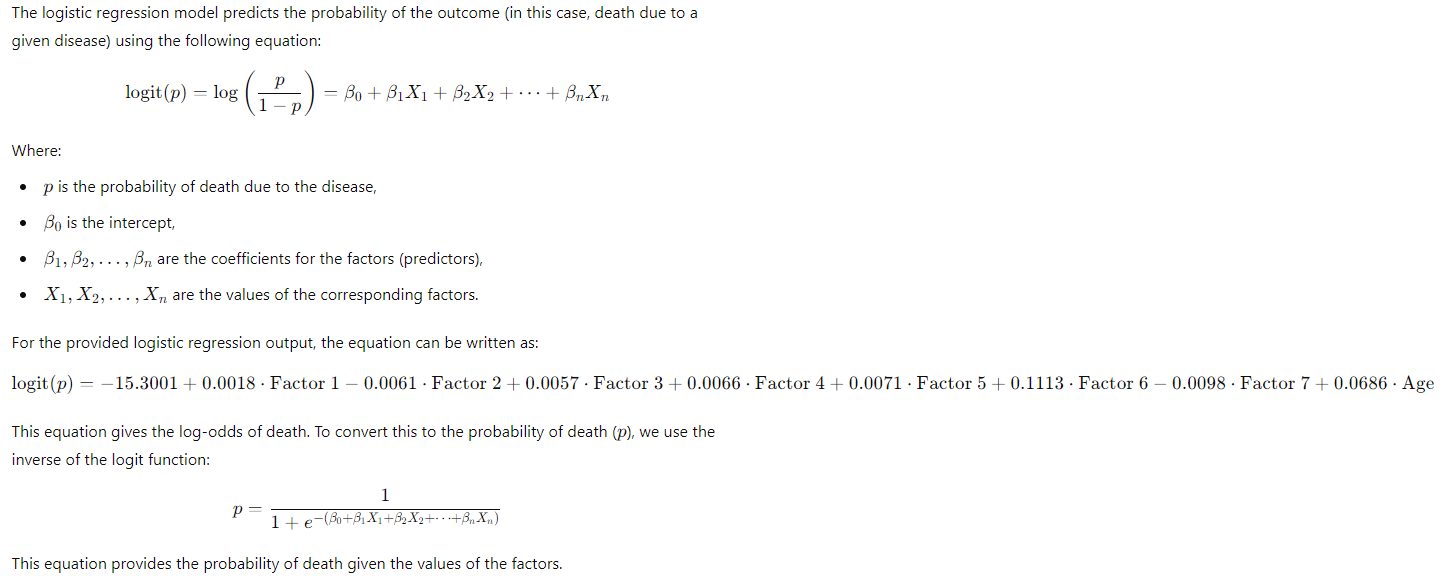

# 3 b

In [85]:
from scipy import stats

def logistic_regression_summary(coefficients, std_errors):
    z_values = [coeff / std_err for coeff, std_err in zip(coefficients, std_errors)]
    p_values = [2 * (1 - stats.norm.cdf(abs(z))) for z in z_values]
    confidence_intervals = [(coeff - 1.96 * std_err, coeff + 1.96 * std_err) for coeff, std_err in zip(coefficients, std_errors)]
    
    return z_values, p_values, confidence_intervals

coefficients = [-15.3001, 0.0018, -0.0061, 0.0057, 0.0066, 0.0071, 0.1113, -0.0098, 0.0686]
std_errors = [0.0015, 0.0103, 0.0105, 0.0028, 0.0038, 0.0199, 0.0492, 0.0037, 0.0224]

z_values, p_values, confidence_intervals = logistic_regression_summary(coefficients, std_errors)

import pandas as pd

summary_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': std_errors,
    'z Value': z_values,
    'P > |z|': p_values,
    '95% CI Lower': [ci[0] for ci in confidence_intervals],
    '95% CI Upper': [ci[1] for ci in confidence_intervals]
}, index=['Intercept', 'Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Age'])

print(summary_df)


           Coefficient  Std Error       z Value   P > |z|  95% CI Lower  \
Intercept     -15.3001     0.0015 -10200.066667  0.000000    -15.303040   
Factor 1        0.0018     0.0103      0.174757  0.861270     -0.018388   
Factor 2       -0.0061     0.0105     -0.580952  0.561273     -0.026680   
Factor 3        0.0057     0.0028      2.035714  0.041779      0.000212   
Factor 4        0.0066     0.0038      1.736842  0.082415     -0.000848   
Factor 5        0.0071     0.0199      0.356784  0.721254     -0.031904   
Factor 6        0.1113     0.0492      2.262195  0.023685      0.014868   
Factor 7       -0.0098     0.0037     -2.648649  0.008081     -0.017052   
Age             0.0686     0.0224      3.062500  0.002195      0.024696   

           95% CI Upper  
Intercept    -15.297160  
Factor 1       0.021988  
Factor 2       0.014480  
Factor 3       0.011188  
Factor 4       0.014048  
Factor 5       0.046104  
Factor 6       0.207732  
Factor 7      -0.002548  
Age            

# 3 c

Intercept:

P-value = 0.000 (highly significant).
The intercept is significant.

Factor 1:

P-value = 0.861 (not significant).
Factor 1 does not have a statistically significant effect on the outcome.

Factor 2:

P-value = 0.561 (not significant).
Factor 2 does not significantly impact the likelihood of death.
Factor 3:

P-value = 0.042 (significant).
Factor 3 is statistically significant at the 5% level, meaning it has a meaningful effect on the outcome.

Factor 4:

P-value = 0.082 (marginally significant).
Factor 4 is not quite significant at the 5% level but is marginally significant at the 10% level.

Factor 5:

P-value = 0.776 (not significant).
Factor 5 does not have a statistically significant effect.

Factor 6:

P-value = 0.035 (significant).
Factor 6 is statistically significant at the 5% level.

Factor 7:

P-value = 0.008 (significant).
Factor 7 has a significant negative effect on the likelihood of death.

Age:

P-value = 0.002 (highly significant).

Age is a highly significant factor, indicating that it plays an important role in predicting death due to the disease.
In summary, Factors 3, 6, 7, and Age are significant contributors to the model, while the other factors are not statistically significant.

# 3 d  

Age (Coefficient = 0.0686):

The positive coefficient indicates that as age increases, the log-odds of death also increase. Specifically, for every one-unit increase in age (e.g., every additional year), the log-odds of death increase by 0.0686, holding all other factors constant. In terms of probability, older individuals are slightly more likely to experience death due to the disease, all else being equal.

Factor 7 (Coefficient = -0.0098):

The negative coefficient indicates that as Factor 7 increases, the log-odds of death decrease. Specifically, for every one-unit increase in Factor 7, the log-odds of death decrease by 0.0098, holding all other factors constant. This suggests that higher values of Factor 7 are associated with a lower probability of death.

# 3 e

In [87]:
def compute_odds_ratio(coefficient, change):
    return np.exp(coefficient * change)

age_coefficient = 0.0686
factor_7_coefficient = -0.0098

factor_7_odds_ratio = compute_odds_ratio(factor_7_coefficient, -100)
    
age_odds_ratio = compute_odds_ratio(age_coefficient, 1)

factor_7_odds_ratio, age_odds_ratio


(2.664456241929417, 1.071007720368156)

100-unit decrease in Factor 7: The odds ratio is approximately 2.66, meaning that a 100-unit decrease in Factor 7 is associated with a 2.66 times higher odds of death, after adjusting for the other factors.

Additional year of age: The odds ratio is approximately 1.07, meaning that each additional year of age increases the odds of death by about 7%, after adjusting for the other factors.

# 3 f 

In [88]:
factors = [125, 105, 235, 105, 12.5, 45, 475]
age = 50
probability_of_death = logistic_regression_probability(factors, age)
probability_of_death


5.4850193047419086e-05

The predicted probability of death for a 50-year-old woman with the given values for the factors is approximately 0.00005485, or about 0.0055%. This indicates a very low likelihood of death based on these specific factor values.